In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.ticker import FuncFormatter
from scipy import stats
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
#load the dataset into a dataframe
# the dataset was downloaded from kaggle and is available at https://www.kaggle.com/datasets/mikhail1681/walmart-sales
raw_data = pd.read_csv('data/raw/Walmart_Sales.csv')
#list data frame attributes
print(raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None


In [3]:
raw_data.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [4]:
raw_data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


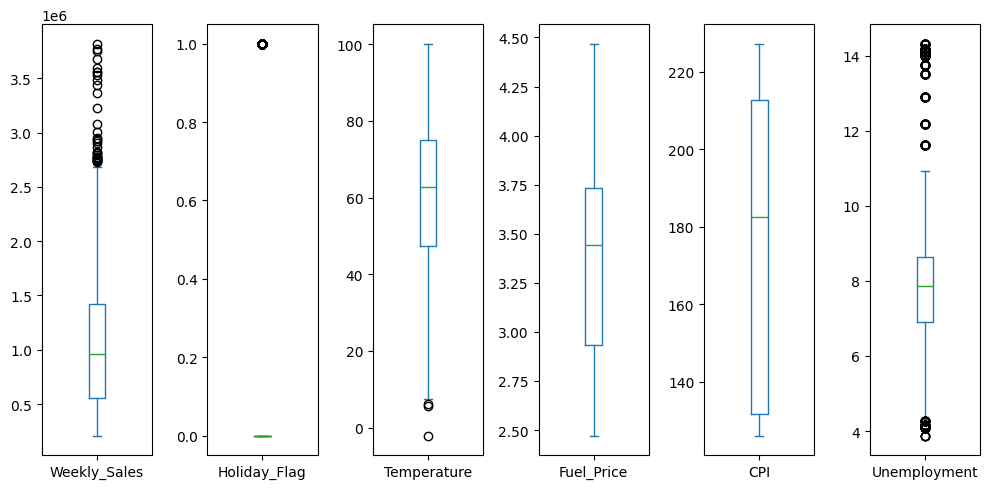

In [5]:
#run boxplots to check for outliers
raw_data.iloc[:,1:8].plot.box(subplots=True, figsize=(10,5))
plt.tight_layout()

Here's an analysis of the box plots:

**General Observations**

*   The box plots visualize the distribution of several variables: Weekly_Sales, Holiday_Flag, Temperature, Fuel\_Price, CPI (Consumer Price Index), and Unemployment.
*   Each box plot displays the median (the line inside the box), the interquartile range (IQR, the box itself, representing the 25th to 75th percentiles), the whiskers (lines extending from the box, typically 1.5 times the IQR), and outliers (individual points beyond the whiskers).

**Analysis of Each Variable**

*   **Weekly\_Sales:** This variable has a wide range and a large number of outliers on the higher end, indicating weeks with significantly higher sales than usual. The median is noticeably lower than the upper range of sales, suggesting a right-skewed distribution. 
*   **Holiday\_Flag:** This is a binary variable (likely 0 or 1).  Most of the data points are 0, with a few occurrences of 1 (holidays).
*   **Temperature:**  The temperature distribution appears fairly normal, with the median around 60. There are a couple of low temperature outliers.
*   **Fuel\_Price:** Fuel prices are relatively concentrated, with a median around 3.5.
*   **CPI:** The CPI has a narrower distribution compared to temperature, with a median around 180.
*   **Unemployment:** The unemployment rate has some high outliers.

---

The dataset appears to be in a fairly good state for initial analysis:
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
- there is no missing data
- data types are ok

In [6]:
#Lets do some data work to support analysis using a new dataframe
processed_data = raw_data.copy()
#add a datwetime column to facilitate temporal analysis
processed_data['date_datetime'] = pd.to_datetime(processed_data['Date'], format='%d-%m-%Y')
processed_data.head(143)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,date_datetime
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05
...,...,...,...,...,...,...,...,...,...
138,1,28-09-2012,1437059.26,0,76.08,3.666,222.981658,6.908,2012-09-28
139,1,05-10-2012,1670785.97,0,68.55,3.617,223.181477,6.573,2012-10-05
140,1,12-10-2012,1573072.81,0,62.99,3.601,223.381296,6.573,2012-10-12
141,1,19-10-2012,1508068.77,0,67.97,3.594,223.425723,6.573,2012-10-19


In [7]:
#persist the processed data

#save the dataframe to a csv file
processed_data.to_csv('data/processed/walmart_sales.csv', index=False)

# Temporal Analysis

The date_datetime column shows that we have 143 weekly data entries per store ranging from 2010-02-05 through and including 2012-10-26

**NOTE:**
The period covered does not lend itself to certain types of analysis.  Issues include:
- comparing annual sales will not work since 2011 is the only year with complete data
- peak sales timeframes that would be expected in 2012 are missing which would skew numbers
- a seasonal comparision is problematic since there are seasonal data gaps


### Let's see how the stores rank by sales totals over the period.

In [8]:
#sales by store over time ordered by total sales

sales_by_store = processed_data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
average_sales = np.mean(sales_by_store)

# Create a DataFrame for plotting
df = pd.DataFrame({'Store': sales_by_store.index, 'Weekly_Sales': sales_by_store.values})

#Plotting sales by store
fig = px.bar(df, x='Store', y='Weekly_Sales',  title='Sales by Store (Total & Average): 2010-02-05 to 2012-10-26', color='Weekly_Sales', color_continuous_scale=px.colors.sequential.Emrld)
# Add a horizontal line for the average sales
fig.add_hline(y=average_sales, line_dash='dash', line_color='red', annotation_text=f'Average Sales: ${average_sales:,.2f}')

# Update the layout
fig.update_layout(xaxis_title='Store Number', yaxis_title='Total Weekly Sales')

# Update the y-axis tick label format
fig.update_yaxes(tickformat='$,.2f')


fig.update_xaxes(type='category')
# Show the plot
fig.show()

The Bar Chart above shows the relative performance of each stores sales over the period - ordered by total sales.  The average line helps visualize stores that are performing above average versus those that are below average.

### Next, let's look at total sales week by week over the period.

In [9]:
#sales by week over the period

sales_by_week = processed_data.groupby('date_datetime')['Weekly_Sales'].sum()

# Create a DataFrame for plotting
df = pd.DataFrame({'Date': sales_by_week.index, 'Weekly_Sales': sales_by_week.values})
#df.head(10)
#Plotting sales by store
fig = px.line(df, x='Date', y='Weekly_Sales',  title='Total Sales by Date: 2010-02-05 to 2012-10-26')


# Update the layout
fig.update_layout(xaxis_title='Week', yaxis_title='Total Weekly Sales')

# Update the y-axis tick label format
fig.update_yaxes(tickformat='$,.2f')


# Update the x-axis to control the granularity
fig.update_xaxes(
    dtick="M1",  # Set the tick interval to 1 month (you can adjust this)
    tickformat="%Y-%m-%d",  # Format for the tick labels
    tickangle=45  # Rotate tick labels for better visibility
)

# Show the plot
fig.show()


As one might expect, the line chart shows that during the period there are clear sales peaks the weeks of Black Friday and Christmas.  Let's hightlight that.

In [10]:

sales_by_week = processed_data.groupby('date_datetime')['Weekly_Sales'].sum()

# Create a DataFrame for plotting
df = pd.DataFrame({'Date': sales_by_week.index, 'Weekly_Sales': sales_by_week.values})

# Sort the DataFrame to find the top 4 highest sales
top_sales = df.nlargest(4, 'Weekly_Sales')

# Plotting sales by week
fig = px.line(df, x='Date', y='Weekly_Sales', title='Total Sales by Date: 2010-02-05 to 2012-10-26')
# Update the layout
fig.update_layout(xaxis_title='Week', yaxis_title='Total Weekly Sales')

# Update the y-axis tick label format
fig.update_yaxes(tickformat='$,.2f')

# Add annotations for the top 4 highest sales
for index, row in top_sales.iterrows():
    fig.add_annotation(
        x=row['Date'],
        y=row['Weekly_Sales'],
        text=f"Peak Sale: ${row['Weekly_Sales']:,.2f} Week:{row['Date']:%Y-%m-%d}",
        showarrow=True,
        arrowhead=2,
        ax=0,
        ay=-40,  # Adjust the position of the label
        font=dict(color="red")
    )

fig.update_xaxes(
    dtick="M1",  # Every month
    tickformat="%Y-%m-%d",  # Format for the tick labels
)

# Show the plot
fig.show()

The improved graph above clearly identifies the peak sales weeks and the sales amount.  

## Holiday Weeks: What is the impact?

In [11]:
#let's get the averages
avg_weekly_sales = processed_data['Weekly_Sales'].mean()
avg_holiday_sales = processed_data[processed_data['Holiday_Flag'] == True]['Weekly_Sales'].mean()
avg_non_holiday_sales = processed_data[processed_data['Holiday_Flag'] == False]['Weekly_Sales'].mean()

print(f'average weekly sales: ${avg_weekly_sales:,.2f}')
print(f'average holiday week sales: ${avg_holiday_sales:,.2f} delta: {avg_holiday_sales - avg_weekly_sales:,.2f} delta percentage: {((avg_holiday_sales - avg_weekly_sales)/avg_weekly_sales)*100:,.2f}%')
print(f'average non-holiday week sales: ${avg_non_holiday_sales:,.2f} delta: {avg_non_holiday_sales - avg_weekly_sales:,.2f} delta percentage: {((avg_non_holiday_sales - avg_weekly_sales)/avg_weekly_sales)*100:,.2f}%')

average weekly sales: $1,046,964.88
average holiday week sales: $1,122,887.89 delta: 75,923.01 delta percentage: 7.25%
average non-holiday week sales: $1,041,256.38 delta: -5,708.50 delta percentage: -0.55%


The difference in sales during holiday weeks is approximately $75K more that the overall average of all weeks.  Note that due to the peak periods which contain holidays, this will likely skew the averages.

In [12]:
holiday_sales = processed_data.groupby('Holiday_Flag')['Weekly_Sales'].mean().reset_index()

# Rename columns for clarity
holiday_sales.columns = ['Holiday_Flag', 'Avg_Weekly_Sales']

# Convert the Holiday_Flag to string labels 'False' and 'True'
holiday_sales['Holiday_Flag'] = holiday_sales['Holiday_Flag'].map({0: 'False', 1: 'True'})

# Create the bar plot
fig = px.bar(holiday_sales, 
             x='Holiday_Flag', 
             y='Avg_Weekly_Sales', 
             labels={'Holiday_Flag': 'Holiday Flag', 'Avg_Weekly_Sales': 'Avg No. of Sales'},
             title='Average Sales per Holiday')

# Update y-axis to format as currency
fig.update_yaxes(tickprefix="$", ticksuffix="", tickformat=",")  # Format y-axis as currency

# Show the figure
fig.show()

# What's Next?
There are a number of potentially interesting data elements in dataset that might suggest factors that might be relevent to store sales.  Perhaps a correlation analysis will show if those factors seems to have a correlation to sales.

In [13]:
# correlation analysis on the data elements provided
correlation_df = processed_data.copy()
correlation_df.drop(['Store', 'Holiday_Flag', 'Date', 'date_datetime'], axis=1, inplace=True)
correlation_df.head(10)

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,1643690.90,42.31,2.572,211.096358,8.106
1,1641957.44,38.51,2.548,211.242170,8.106
2,1611968.17,39.93,2.514,211.289143,8.106
3,1409727.59,46.63,2.561,211.319643,8.106
4,1554806.68,46.50,2.625,211.350143,8.106
5,1439541.59,57.79,2.667,211.380643,8.106
6,1472515.79,54.58,2.720,211.215635,8.106
7,1404429.92,51.45,2.732,211.018042,8.106
8,1594968.28,62.27,2.719,210.820450,7.808
9,1545418.53,65.86,2.770,210.622857,7.808


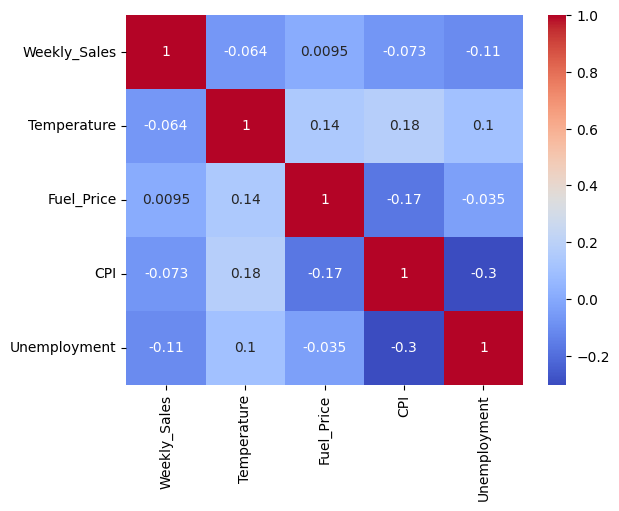

In [14]:
#plotting the pearson correlation

correlation_matrix = correlation_df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Based on the above, it would appear that there is no strong correlations between sales and factors such as Temperature, Fuel Price, CPI or Unemployment Rates


For example, from the correlation matrix:

Unemployment vs. Weekly Sales: The correlation coefficient between "unemployment" and "weekly_sales" is -0.11. This is a negative correlation. A negative correlation suggests that as one variable increases, the other tends to decrease. Therefore, a decrease in unemployment tends to be associated with an increase in sales. The correlation is weak though, closer to 0 than -1.

Temperature vs. Fuel Price: The correlation coefficient between "temperature" and "fuel_price" is 0.14. This is a positive correlation. A positive correlation suggests that as one variable increases, the other also tends to increase. Therefore, the higher the temperature, the higher the fuel price. Like the previous point, the correlation is weak.

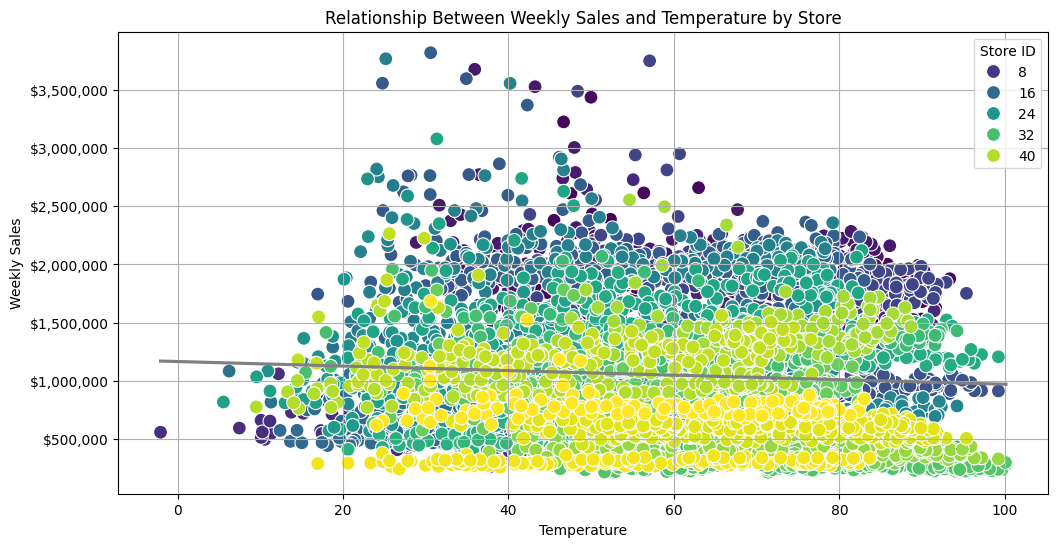

In [17]:


df = processed_data.copy()

# Create a scatter plot with a regression line
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales', hue='Store', palette='viridis', s=100)

# Create a function to format the y-axis labels as currency
def currency_formatter(x, _):
    return f'${x:,.0f}'  # Format as currency with commas and no decimal places

# Set the y-axis formatter to the currency formatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))

# Optionally, add a regression line for each store
sns.regplot(data=df, x='Temperature', y='Weekly_Sales', scatter=False, color='gray', ci=None)

# Customize the plot
plt.title('Relationship Between Weekly Sales and Temperature by Store')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.legend(title='Store ID')
plt.grid(True)

# Show the plot
plt.show()

**Overall Interpretation of the Scatter Plot:**

The scatter plot displays the relationship between weekly sales and temperature, broken down by store ID. Here's what we can observe:

*   **Weak Negative Trend (Overall):** There appears to be a *slight* negative trend between temperature and weekly sales. As temperature increases, weekly sales *tend* to decrease slightly, based on the downward slope of the regression line. However, the points are widely scattered, indicating that temperature is *not* a strong predictor of weekly sales.
*   **Clustering by Store ID:** The data points are clearly clustered by store ID (represented by different colors). Some stores consistently have higher sales volumes than others, regardless of temperature. This suggests that store-specific characteristics (e.g., location, management, demographics of the area, store size, product selection, marketing strategies) have a much stronger influence on sales than temperature alone. Store 8 has higher sales volume than Store 40.
*   **Heterogeneous Variance:** The spread of the data points (variance) seems to change as temperature increases. At lower temperatures, the range of weekly sales is wider, while at higher temperatures, the sales values seem to be more concentrated. This is called heteroscedasticity and might require special statistical treatment if you are building a predictive model.
*   **Possible Outliers:** There are a few data points that fall far away from the main clusters. These outliers could be due to errors in data collection or special events that significantly impacted sales in a given week.

**Significance of the Regression Line:**

The grey regression line represents the line of best fit through all the data points, regardless of store ID. Its significance is limited in this case for the following reasons:

*   **Weak Explanatory Power:** Because the overall relationship between temperature and weekly sales is weak (the data is highly scattered), the regression line doesn't explain much of the variance in weekly sales. The R-squared value (which isn't shown but would likely be low) would indicate the proportion of variance explained by the model.
*   **Ignores Store-Specific Effects:** The regression line treats all stores as the same, ignoring the significant differences in sales volume between stores. A single regression line is not appropriate when store ID has a significant impact on sales.
*   **Potential for Misleading Interpretation:** Relying solely on the regression line could lead to the incorrect conclusion that temperature significantly impacts sales across all stores. In reality, the primary driver of sales appears to be store-specific factors.



**Better Ways to Analyze the Data:**

Given the clustering by store ID, here are some better approaches for analyzing this data:

1.  **Analyze each store separately:** Create separate scatter plots and regression lines for each store ID. This would allow you to see if there's a different relationship between temperature and sales for different stores. Some stores might have a stronger negative correlation than others, or even a positive correlation.
2.  **Mixed-Effects Model/Multilevel Model:** Use a mixed-effects model or multilevel model. This type of model can account for both the overall effect of temperature on sales *and* the store-specific effects. Store ID would be treated as a random effect.
3.  **Include Store ID as a Categorical Variable in a Regression Model:** If you want to build a single regression model, include store ID as a categorical (dummy) variable. This would allow the model to estimate a different intercept for each store, reflecting their different baseline sales levels.
4.  **Look for Interactions:** Explore whether there's an interaction effect between temperature and store ID. Perhaps the effect of temperature on sales is different for different types of stores (e.g., stores in warmer climates vs. stores in colder climates).

**In summary:**

While the scatter plot shows a slight negative trend between temperature and weekly sales, the relationship is weak, and the regression line isn't very informative. The primary driver of sales appears to be store-specific factors, which should be taken into account in any further analysis. Analyzing each store separately or using a mixed-effects model would provide a more accurate understanding of the relationship between temperature and sales.

In [18]:


fig = px.scatter(df, x='Temperature', y='Weekly_Sales', color='Store',
                 title='Relationship Between Weekly Sales and Temperature by Store',
                 labels={'Temperature': 'Temperature', 'Weekly_Sales': 'Weekly Sales'},
                 hover_data=['Store'])


# Calculate the regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Temperature'], df['Weekly_Sales'])

# Create x values for the regression line
x_values = np.linspace(df['Temperature'].min(), df['Temperature'].max(), 100)
# Calculate the corresponding y values using the regression equation
y_values = slope * x_values + intercept

# Add the regression line to the plot
fig.add_scatter(x=x_values, y=y_values, mode='lines', name='Regression Line', line=dict(color='gray', dash='dash'))
# Update layout
fig.update_layout(xaxis_title='Temperature', yaxis_title='Weekly Sales')

# Show the plot
fig.show()

Compare all stores to highest sales and lowest sales stores to see if the relationships are similar.

In [19]:
#this plot code gets repetitive, lets put it in a function
def plot_scatter_with_regression(df, x_col, y_col, color_col, title, x_label, y_label):
    fig = px.scatter(df, x=x_col, y=y_col, color=color_col,
                     title=title,
                     labels={x_col: x_label, y_col: y_label},
                     hover_data=[color_col])

    # Calculate the regression line
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[x_col], df[y_col])

    # Create x values for the regression line
    x_values = np.linspace(df[x_col].min(), df[x_col].max(), 100)
    # Calculate the corresponding y values using the regression equation
    y_values = slope * x_values + intercept

    # Add the regression line to the plot
    fig.add_scatter(x=x_values, y=y_values, mode='lines', name='Regression Line', line=dict(color='gray', dash='dash'))
    # Update layout
    fig.update_layout(xaxis_title=x_label, yaxis_title=y_label)

    # Show the plot
    fig.show()

#plotting the relationship between weekly sales and fuel price
plot_scatter_with_regression(df, 'Fuel_Price', 'Weekly_Sales', 'Store',
                              'Relationship Between Weekly Sales and Fuel Price by Store',
                              'Fuel Price', 'Weekly Sales') 

plot_scatter_with_regression(df, 'Temperature', 'Weekly_Sales', 'Store',
                              'Relationship Between Weekly Sales and Temperature by Store',
                              'Temperature', 'Weekly Sales') 

plot_scatter_with_regression(df, 'CPI', 'Weekly_Sales', 'Store',
                                'Relationship Between Weekly Sales and CPI by Store',
                                'CPI', 'Weekly Sales')
plot_scatter_with_regression(df, 'Unemployment', 'Weekly_Sales', 'Store',
                                'Relationship Between Weekly Sales and Unemployment by Store',
                                'Unemployment', 'Weekly Sales')                     
                                

                                

In [20]:


df = processed_data.copy()

# Create a subplot with 3 rows
fig = make_subplots(rows=3, cols=1, subplot_titles=("All Stores", "Store 20", "Store 33"))

# Function to add scatter plot and regression line to a subplot
def add_scatter_with_regression(fig, data, row, col):
    # Scatter plot
    fig.add_trace(
        go.Scatter(x=data['Temperature'], y=data['Weekly_Sales'], mode='markers', name='Data Points'),
        row=row, col=col
    )
    
    # Calculate the regression line
    slope, intercept, r_value, p_value, std_err = stats.linregress(data['Temperature'], data['Weekly_Sales'])
    
    # Create x values for the regression line
    x_values = np.linspace(data['Temperature'].min(), data['Temperature'].max(), 100)
    # Calculate the corresponding y values using the regression equation
    y_values = slope * x_values + intercept
    
    # Add the regression line
    fig.add_trace(
        go.Scatter(x=x_values, y=y_values, mode='lines', name='Regression Line', line=dict(color='gray', dash='dash')),
        row=row, col=col
    )

# Plot for all stores
add_scatter_with_regression(fig, df, row=1, col=1)

# Plot for Store 20
store_20_data = df[df['Store'] == 20]
add_scatter_with_regression(fig, store_20_data, row=2, col=1)

# Plot for Store 33
store_33_data = df[df['Store'] == 33]
add_scatter_with_regression(fig, store_33_data, row=3, col=1)

# Update layout
fig.update_layout(title='Weekly Sales vs Temperature', height=900)

# Show the plot
fig.show()

Try other comparisons: Fuel_Price, CPI, Unemployment

In [21]:
df = processed_data.copy()

# Create a subplot with 3 rows
fig = make_subplots(rows=3, cols=1, subplot_titles=("All Stores", "Store 20", "Store 33"))

# Function to add scatter plot and regression line to a subplot
def add_scatter_with_regression(fig, data, row, col):
    # Scatter plot
    fig.add_trace(
        go.Scatter(x=data['Fuel_Price'], y=data['Weekly_Sales'], mode='markers', name='Data Points'),
        row=row, col=col
    )
    
    # Calculate the regression line
    slope, intercept, r_value, p_value, std_err = stats.linregress(data['Fuel_Price'], data['Weekly_Sales'])
    
    # Create x values for the regression line
    x_values = np.linspace(data['Fuel_Price'].min(), data['Fuel_Price'].max(), 100)
    # Calculate the corresponding y values using the regression equation
    y_values = slope * x_values + intercept
    
    # Add the regression line
    fig.add_trace(
        go.Scatter(x=x_values, y=y_values, mode='lines', name='Regression Line', line=dict(color='gray', dash='dash')),
        row=row, col=col
    )

# Plot for all stores
add_scatter_with_regression(fig, df, row=1, col=1)

# Plot for Store 20
store_20_data = df[df['Store'] == 20]
add_scatter_with_regression(fig, store_20_data, row=2, col=1)

# Plot for Store 33
store_33_data = df[df['Store'] == 33]
add_scatter_with_regression(fig, store_33_data, row=3, col=1)

# Update layout
fig.update_layout(title='Weekly Sales vs Fuel Price', height=900)

# Show the plot
fig.show()

In [22]:
df = processed_data.copy()

# Create a subplot with 3 rows
fig = make_subplots(rows=3, cols=1, subplot_titles=("All Stores", "Store 20", "Store 33"))

# Function to add scatter plot and regression line to a subplot
def add_scatter_with_regression(fig, data, row, col):
    # Scatter plot
    fig.add_trace(
        go.Scatter(x=data['CPI'], y=data['Weekly_Sales'], mode='markers', name='Data Points'),
        row=row, col=col
    )
    
    # Calculate the regression line
    slope, intercept, r_value, p_value, std_err = stats.linregress(data['CPI'], data['Weekly_Sales'])
    
    # Create x values for the regression line
    x_values = np.linspace(data['CPI'].min(), data['CPI'].max(), 100)
    # Calculate the corresponding y values using the regression equation
    y_values = slope * x_values + intercept
    
    # Add the regression line
    fig.add_trace(
        go.Scatter(x=x_values, y=y_values, mode='lines', name='Regression Line', line=dict(color='gray', dash='dash')),
        row=row, col=col
    )

# Plot for all stores
add_scatter_with_regression(fig, df, row=1, col=1)

# Plot for Store 20
store_20_data = df[df['Store'] == 20]
add_scatter_with_regression(fig, store_20_data, row=2, col=1)

# Plot for Store 33
store_33_data = df[df['Store'] == 33]
add_scatter_with_regression(fig, store_33_data, row=3, col=1)

# Update layout
fig.update_layout(title='Weekly Sales vs CPI', height=900)

# Show the plot
fig.show()

In [23]:
df = processed_data.copy()

# Create a subplot with 3 rows
fig = make_subplots(rows=3, cols=1, subplot_titles=("All Stores", "Store 20", "Store 33"))

# Function to add scatter plot and regression line to a subplot
def add_scatter_with_regression(fig, data, row, col):
    # Scatter plot
    fig.add_trace(
        go.Scatter(x=data['Unemployment'], y=data['Weekly_Sales'], mode='markers', name='Data Points'),
        row=row, col=col
    )
    
    # Calculate the regression line
    slope, intercept, r_value, p_value, std_err = stats.linregress(data['Fuel_Price'], data['Weekly_Sales'])
    
    # Create x values for the regression line
    x_values = np.linspace(data['Unemployment'].min(), data['Unemployment'].max(), 100)
    # Calculate the corresponding y values using the regression equation
    y_values = slope * x_values + intercept
    
    # Add the regression line
    fig.add_trace(
        go.Scatter(x=x_values, y=y_values, mode='lines', name='Regression Line', line=dict(color='gray', dash='dash')),
        row=row, col=col
    )

# Plot for all stores
add_scatter_with_regression(fig, df, row=1, col=1)

# Plot for Store 20
store_20_data = df[df['Store'] == 20]
add_scatter_with_regression(fig, store_20_data, row=2, col=1)

# Plot for Store 33
store_33_data = df[df['Store'] == 33]
add_scatter_with_regression(fig, store_33_data, row=3, col=1)

# Update layout
fig.update_layout(title='Weekly Sales vs Unemployment', height=900)

# Show the plot
fig.show()

All these scatter pllots appear to confirm earlier analysis that the relationship of sales to these other factors is week.  

# End of project.
Note that dataset limitations severly inhibit the amount of insight that can be obtained related to sales performance.